# Lab 9

Recreate your testNet neural network in Tensorflow and compare the performance of the two networks.
Give possible reasons for their different performance

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

2024-01-06 00:45:22.104831: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-06 00:45:22.104860: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-06 00:45:22.104876: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-06 00:45:22.109313: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Loading the dataset
mnist = keras.datasets.mnist

(images_train, labels_train), (images_test, labels_test) = mnist.load_data()
images_train, images_test = images_train / 255.0, images_test / 255.0

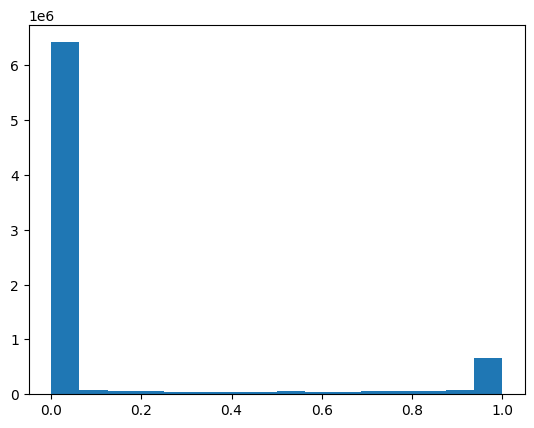

In [3]:
plt.hist(images_test.flatten(),16)
plt.show()

In [14]:
# Building the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  # tf.keras.layers.Dropout(0.2), # To prevent overfitting: selects a fraction of input neurons at random, and sets their output to 0. Reduces overdependency on specific neurons
  tf.keras.layers.Dense(10, activation='softmax') # Without softmax function, due to https://www.tensorflow.org/tutorials/quickstart/beginner?hl=en#:~:text=Note%3A%20It,a%20softmax%20output. (Did I interpret this correctly?) 
])

# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=(28, 28)),
#     keras.layers.Dense(128, activation=tf.nn.relu),
#     keras.layers.Dense(10, activation=tf.nn.softmax)
# ])

In [15]:
model.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# Training and evaluating model
history = model.fit(images_train, labels_train, validation_data=(images_test, labels_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2542 - accuracy: 0.9284 - val_loss: 0.1288 - val_accuracy: 0.9612
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1098 - accuracy: 0.9680 - val_loss: 0.0918 - val_accuracy: 0.9713
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0759 - accuracy: 0.9770 - val_loss: 0.0861 - val_accuracy: 0.9746
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0573 - accuracy: 0.9829 - val_loss: 0.0711 - val_accuracy: 0.9773
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0430 - accuracy: 0.9870 - val_loss: 0.0811 - val_accuracy: 0.9746
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0343 - accuracy: 0.9897 - val_loss: 0.0778 - val_accuracy: 0.9760
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0283 - accuracy: 0.9915 - val_loss: 0.0670 - val_accuracy:

In [18]:
# Loading my handwritten digits
my_digits = np.load('/home/nnds1b/lab/lab_8/my_digits.npy')

In [19]:
predictions = model.predict(my_digits)
print(predictions.shape)

1/1 [==============================] - 0s 47ms/step
(6, 10)


9


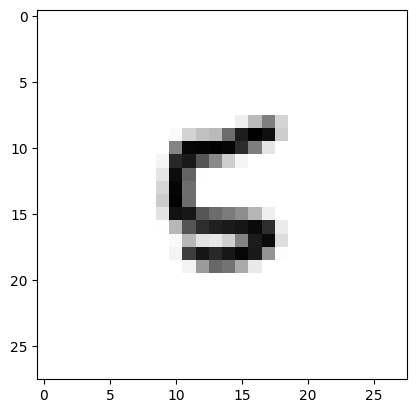

1


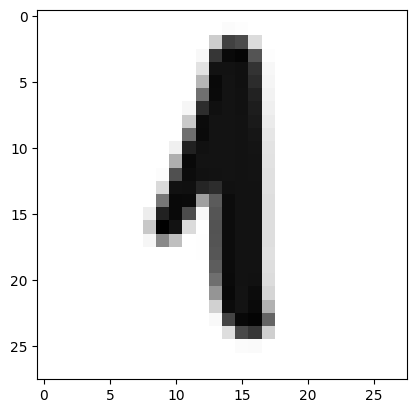

9


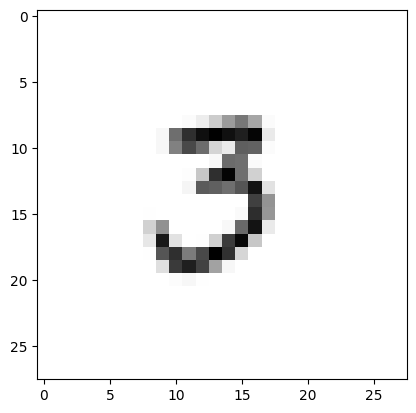

4


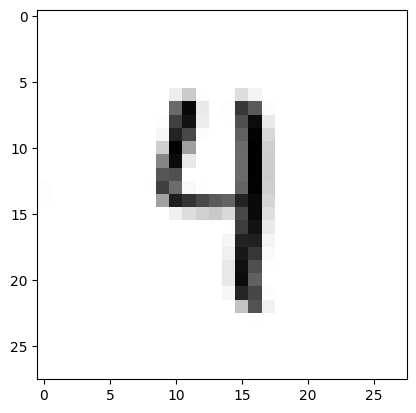

6


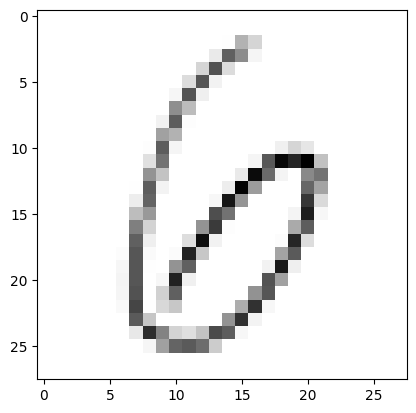

2


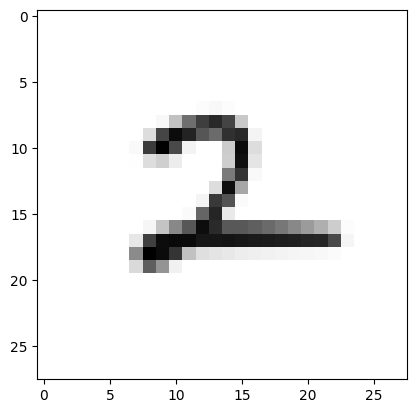

In [20]:
for i, prediction in enumerate(predictions):
    print(np.argmax(prediction))

    plt.imshow(my_digits[i], cmap='Greys')
    plt.show()

In [21]:
model.save('numberNet.h5')

/home/nnds1b/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Problem 2

Tensorflow’s `fit` method returns a history object which in turn contains an attribute `history`. Extract it from the object. Use it to plot the validation accuracy, training accuracy and loss as a function of the epoch.

In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

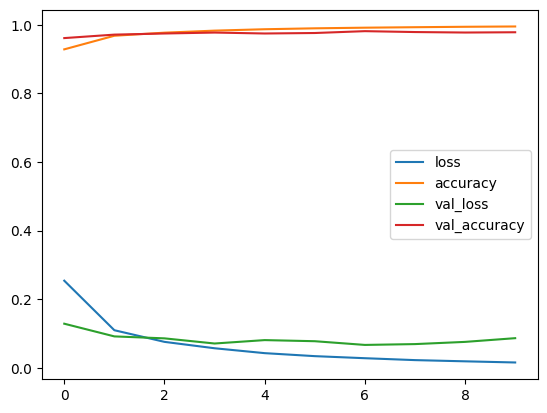

In [37]:
for key in history.history.keys():
    plt.plot(history.history[key], label=key)

#[plt.plot(history.history[key], label=key) for key in history.history.keys()]


plt.legend()
plt.show()

Set up a network with a single fully connected layer with 256 nodes (ReLU activated) and train it on MNIST Fashion.

In [7]:
fashionMnist = keras.datasets.fashion_mnist

(trainImages, trainLabels), (testImages, testLabels) = fashionMnist.load_data()
testImages = testImages/255
trainImages = trainImages/255

In [3]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

2024-01-05 15:24:41.753405: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-05 15:24:41.756509: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-05 15:24:41.756639: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [4]:
model.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
fashion_history = model.fit(trainImages, trainLabels, epochs=20, batch_size=32)

Epoch 1/20


2024-01-05 15:24:42.425526: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-05 15:24:42.515826: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f297e860960 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-05 15:24:42.515851: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070, Compute Capability 8.9
2024-01-05 15:24:42.521471: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-05 15:24:42.537755: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8900
2024-01-05 15:24:42.626878: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 4s 2ms/step - loss: 0.4874 - accuracy: 0.8280
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3641 - accuracy: 0.8685
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3254 - accuracy: 0.8801
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3016 - accuracy: 0.8904
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2862 - accuracy: 0.8935
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2718 - accuracy: 0.8985
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2574 - accuracy: 0.9041
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2481 - accuracy: 0.9073
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2367 - accuracy: 0.9112
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2307 - accurac

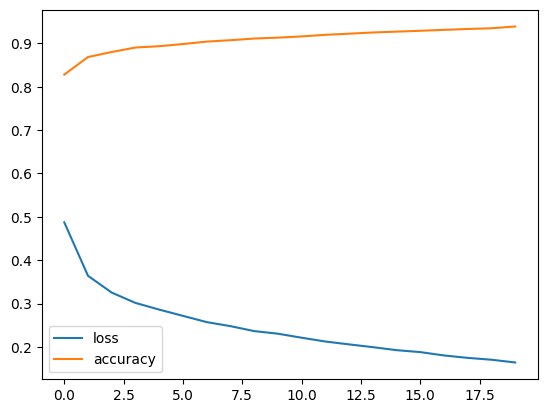

In [6]:
for key in fashion_history.history.keys():
    plt.plot(fashion_history.history[key], label=key)

plt.legend()
plt.show()

In [7]:
model.save('fashionNet.h5')

/home/nnds1b/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Problem 3

Tensorflow provides the `tf.math.confusion_matrix` method to create a simple confusion matrix. It returns a `tf.tensor` which can be converted into a regular Numpy array using `np.array`. Write a function `confusion_matrix` that takes a Tensorflow model and a test dataset, evaluates the test dataset, calculates the confusion matrix and turns it into something more readable, e.g. by providing labels, additional explanations, or even a nice graph via `plt.img`.

In [17]:
import seaborn as sns

In [14]:
def confusion_matrix(model, test_data, test_labels, descriptors):
    predictions = model.predict(test_data)
    predicted_labels = np.array( [np.argmax( vec ) for vec in predictions] )
    conf_matrix = tf.math.confusion_matrix(test_labels,predicted_labels)
    conf_matrix_np = conf_matrix.numpy()

    # Visualization using Seaborn's heatmap
    sns.heatmap(conf_matrix_np, annot=True, fmt='d', cmap='Blues',
                xticklabels=descriptors, yticklabels=descriptors)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [11]:
#Loading the model

newModel = keras.models.load_model('fashionNet.h5')

newModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


313/313 [==============================] - 0s 617us/step


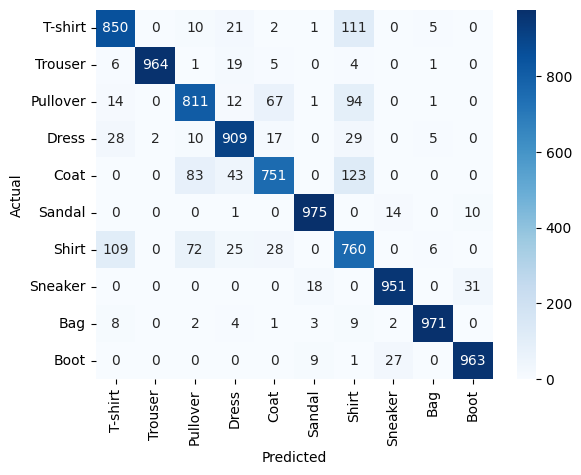

In [12]:
confusion_matrix(newModel, testImages, testLabels, descriptors = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Boot"])

## Problem 4

So far, we have been working with grayscale images.

a) Why are color images harder to process and cannot be directly fed into the neural networks that we have created up to this point?

They're harder to process because each pixel in a colored image has three channels (R,G,B) as opposed to just one in the grayscale image. 

b) In our shared folder, you will find a grayscale version of the famous CIFAR-10 dataset. It consists of a total of 60,000 images (32x32 pixels) of objects that each belong to one of ten classes (see classNames.txt). Load the data (provided as *.npy files) into a notebook.

In [24]:
path = '/mnt/share/nnds/cifar10bw/'
cifar_test_data = np.load(path+'dataTest.npy')
cifar_test_labels = np.load(path+'labelsTest.npy')
cifar_train_data = np.load(path+'dataTrain.npy')
cifar_train_labels = np.load(path+'labelsTrain.npy')

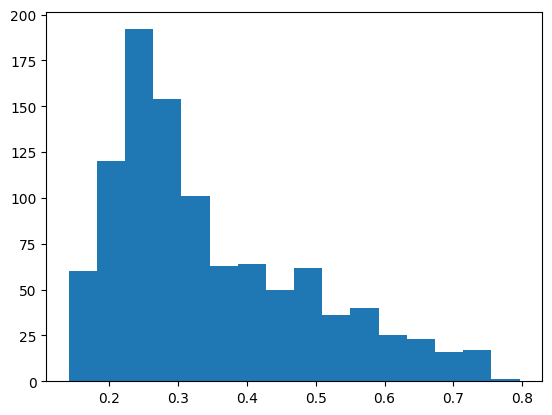

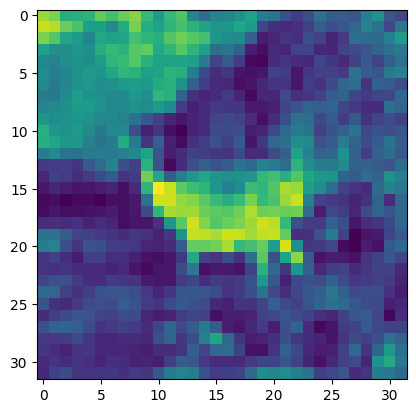

In [25]:
plt.hist(cifar_test_data[130].flatten(), 16)
plt.show()
plt.imshow(cifar_test_data[130])

In [26]:
cifar_test_data.shape

(10000, 32, 32)

c) Create a network with a single hidden layer with 256 nodes (ReLU activation) and a softmaxed output. Train the network for (up to) 50 epochs and discuss the performance of the network.

In [27]:
# Building the model
cifar_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [28]:
cifar_model.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
cifar_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               262400    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 264970 (1.01 MB)
Trainable params: 264970 (1.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
cifar_model_history = cifar_model.fit(cifar_train_data, cifar_train_labels,validation_data=(cifar_test_data, cifar_test_labels), epochs=50)

Epoch 1/50
 823/1563 [==============>...............] - ETA: 1s - loss: 2.1031 - accuracy: 0.2359

1563/1563 [==============================] - 4s 2ms/step - loss: 2.0523 - accuracy: 0.2599 - val_loss: 1.9656 - val_accuracy: 0.2973
Epoch 2/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.9246 - accuracy: 0.3128 - val_loss: 1.9023 - val_accuracy: 0.3223
Epoch 3/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8626 - accuracy: 0.3381 - val_loss: 1.8316 - val_accuracy: 0.3481
Epoch 4/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8174 - accuracy: 0.3542 - val_loss: 1.8082 - val_accuracy: 0.3532
Epoch 5/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7897 - accuracy: 0.3664 - val_loss: 1.8195 - val_accuracy: 0.3493
Epoch 6/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7679 - accuracy: 0.3737 - val_loss: 1.7854 - val_accuracy: 0.3665
Epoch 7/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7500 - accuracy: 0.3807 - val_loss: 1.7675 - val_accuracy: 0.3750
Epo

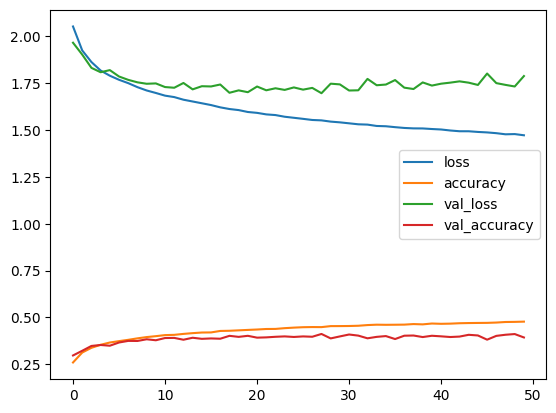

In [31]:
for key in cifar_model_history.history.keys():
    plt.plot(cifar_model_history.history[key], label=key)

plt.legend()
plt.show()

d) Calculate the fraction of correctly classified images as a function of the image class.

In [32]:
class_names = []

with open(path+'classNames.txt', 'r') as file:
    class_names = file.read().splitlines()

313/313 [==============================] - 0s 596us/step


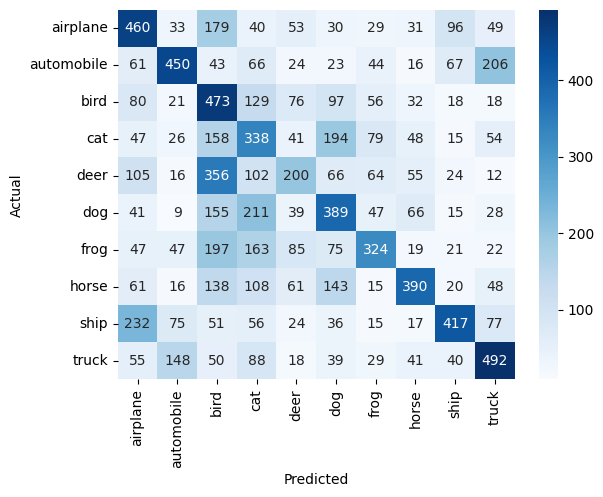

In [33]:
confusion_matrix(cifar_model, cifar_test_data, cifar_test_labels, class_names)

In [39]:
cifar_model.save('cifar_model.h5')

/home/nnds1b/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


e) Create a network with two hidden layers with 256 nodes each (ReLU activation) and a softmaxed output. Train the network for (up to) 50 epochs. Did the performance improve?

In [34]:
cifar_model_256 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')])

cifar_model_256.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cifar_model_256.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               262400    
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 330762 (1.26 MB)
Trainable params: 330762 (1.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cifar_model_256_history = cifar_model_256.fit(cifar_train_data, cifar_train_labels,validation_data=(cifar_test_data, cifar_test_labels), epochs=50)

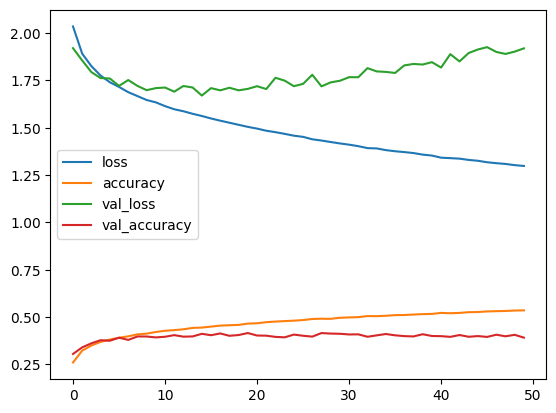

In [37]:
for key in cifar_model_256_history.history.keys():
    plt.plot(cifar_model_256_history.history[key], label=key)

plt.legend()
plt.show()

313/313 [==============================] - 0s 645us/step


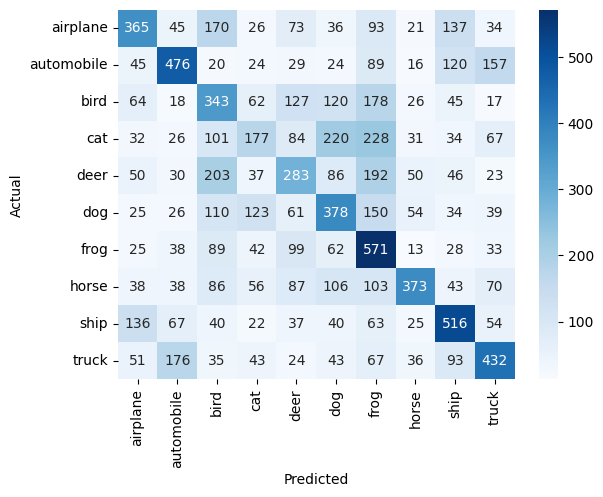

In [38]:
confusion_matrix(cifar_model_256, cifar_test_data, cifar_test_labels, class_names)

In [40]:
cifar_model_256.save('cifar_model_256.h5')